In [1]:
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

In [2]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', C=1.0, random_state=0)
svm.fit(X_train_std, y_train)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

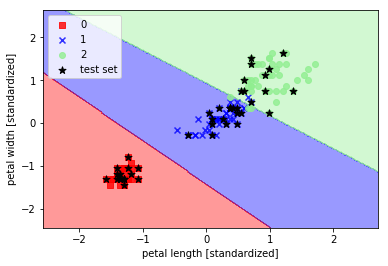

In [3]:
%matplotlib inline
from plot_decision_regions import plot_decision_regions
import matplotlib.pyplot as plt

plot_decision_regions(X_combined_std, y_combined, classifier=svm, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

In [4]:
np.random.seed(0)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 0)
print(y_xor)

[False False  True  True  True False False False  True  True  True  True
  True  True False False False  True False False False  True False  True
 False  True False  True False False False False  True  True  True False
  True  True False  True  True  True False  True  True  True False False
 False False  True  True  True False False False  True  True  True False
  True False False  True False  True  True  True  True  True  True False
 False  True False  True False False  True False  True False  True False
 False False  True  True False  True False False  True  True  True  True
 False  True False False False False  True False  True False  True False
  True  True False  True  True False False False  True  True  True False
 False False False False False  True  True False False  True False False
  True False  True  True False False  True  True  True  True False  True
 False False  True  True False  True  True False  True False  True  True
 False  True False False False  True False  True  T

In [5]:
y_xor = np.where(y_xor, 1, -1)
print(y_xor)

[-1 -1  1  1  1 -1 -1 -1  1  1  1  1  1  1 -1 -1 -1  1 -1 -1 -1  1 -1  1 -1
  1 -1  1 -1 -1 -1 -1  1  1  1 -1  1  1 -1  1  1  1 -1  1  1  1 -1 -1 -1 -1
  1  1  1 -1 -1 -1  1  1  1 -1  1 -1 -1  1 -1  1  1  1  1  1  1 -1 -1  1 -1
  1 -1 -1  1 -1  1 -1  1 -1 -1 -1  1  1 -1  1 -1 -1  1  1  1  1 -1  1 -1 -1
 -1 -1  1 -1  1 -1  1 -1  1  1 -1  1  1 -1 -1 -1  1  1  1 -1 -1 -1 -1 -1 -1
  1  1 -1 -1  1 -1 -1  1 -1  1  1 -1 -1  1  1  1  1 -1  1 -1 -1  1  1 -1  1
  1 -1  1 -1  1  1 -1  1 -1 -1 -1  1 -1  1  1  1  1  1  1  1  1 -1 -1  1 -1
 -1  1 -1 -1  1 -1 -1  1 -1 -1  1  1 -1  1  1  1 -1  1 -1 -1  1 -1 -1 -1 -1]


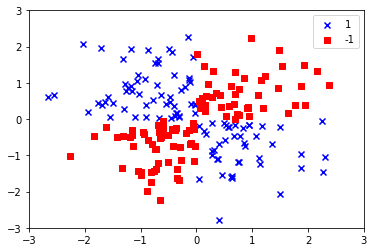

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(X_xor[y_xor==1, 0], X_xor[y_xor==1, 1], c='b', marker='x', label='1')
plt.scatter(X_xor[y_xor==-1, 0], X_xor[y_xor==-1, 1], c='r', marker='s', label='-1')
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend(loc='best')
plt.show()

In [7]:
svm = SVC(kernel='rbf', random_state=0, gamma=0.10, C=10.0)
svm.fit(X_xor, y_xor)

SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

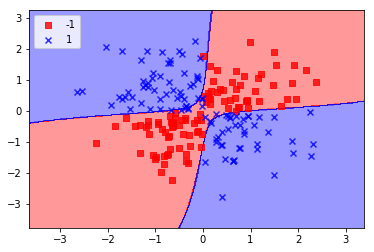

In [8]:
%matplotlib inline
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.show()

In [9]:
svm = SVC(kernel='rbf', random_state=0, gamma=0.2, C=1.0)
svm.fit(X_train_std, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.2, kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

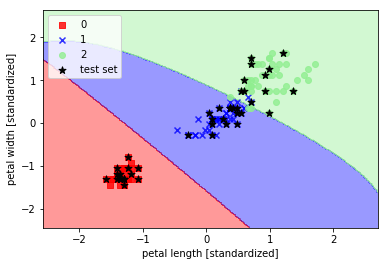

In [10]:
%matplotlib inline
plot_decision_regions(X_combined_std, y_combined, classifier=svm, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

In [11]:
svm = SVC(kernel='rbf', random_state=0, gamma=100.0, C=1.0)
svm.fit(X_train_std, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=100.0, kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

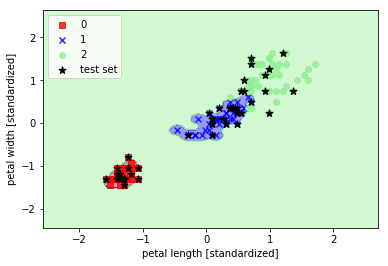

In [12]:
%matplotlib inline
plot_decision_regions(X_combined_std, y_combined, classifier=svm, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()